# Explainer notebook

*Henrik Foss Jørgensen, s153975*

*Peter Holmsø, s154679*

*Trond Fredskilde, s153149*


This project focuses on the Covid-19 outbreak in the United states. Different datasets have been chosen to analyse the outbreak. the first dataset is containing data about the covid-19 in the different states. The second is having demographic data, where the third dataset is containing population data. By including all three dataset, a comprehensive analysis can be made. 

First all nessesary packages will be loaded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from datetime import datetime
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.models.tools import HoverTool
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,CustomJS, CustomJSFilter, GeoJSONDataSource, HoverTool,LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# set up output file as first thing
output_notebook()

#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Loading BokehJS ...

## 1. Motivation 
This section will focus on the chosen datasets and describe the overall goal for the user experience.

#### 1.1 Covid-19 dataset
Dataset: (https://www.kaggle.com/sudalairajkumar/covid19-in-usa#us_states_covid19_daily.csv)

The dataset about the covid-19 outbreak is taken from kaggle. It is containing information about different covid measurements such as positive cases, hospitalized, recovered, deaths, and much more, for each day in each state. 

The dataset is used to get information about the covid-19 outbreak in the united states. 

#### 1.2 Demographic dataset
Dataset: (https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2017_census_tract_data.csv)

The demographic data is also taken from kaggle. It is containing information about different demographic features in each census tract of the United States. 

The data is used to analyse, if there is any demographic features that are important for the corona outbreak.

#### 1.3 Population dataset
Dataset: (https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/)

The last dataset is containing data about the population, area and density of each state. 

The data is used to normalize the covid-19 data based on density. This will give a more clear picture when comparing the states.

#### 1.4 Goal for user experience
The overall goal is to tell a clear story, by using data visualizations. By introducing interactive plots, together with explanatory text, the reader should be able to get a good overview of the covid-19 outbreak in the United States. Exponential growth is often hard for people to understand, where this notebook hopefully can visualize the phenomenon in an easy understandable way. 

## 2. Basic stats 
This section will give a better understanding of the data presented earlier. 

#### 2.1 Data cleaning and preprocessing
Data cleaning and preprocessing is important when working with data. The covid-19 dataset contained the state name as a 2 letter abbreviation. In order to make it fit to the other datasets, it was changed to the actual state name. Considering the demographic dataset different preprocessing was needed. Because the data was given for each census tract, it was converted to be for each state. No preprocessing was done for the population dataset, since it was already given for each state.

#### 2.2 Key points from the exploratory analysis
To show the key points from the exploratory analysis, the main plots from each dataset will be presented.
###### Covid-19 dataset

In [2]:
#Loading data 
df_covid = pd.read_csv("us_states_covid19_daily.csv") #

In [3]:
#To merge the two dataframes, a dictionary for mapping the states is made
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
#convert names
States = []
for i in range(len(df_covid)):
    States = np.append(States, states[df_covid.state[i]])
df_covid['state'] = States
df_covid = df_covid.rename(columns={'state': 'State'})

In [5]:
#Calculating the date as the days since the first outbreak was recorded .
df_covid["DateTime"] = pd.to_datetime(df_covid['date'], format='%Y%m%d', errors='ignore')
d0 = datetime(2020, 1, 22)
df_covid['DayNumber'] = df_covid.apply(lambda x : (x["DateTime"]-d0).days, axis=1)
df_covid = df_covid.drop(columns=['DateTime'])

In [6]:
#Choosing the categories to analyse
df_covid = df_covid[["DayNumber","State",'death','positive','negative']]
df_covid['DayNumber'] = df_covid.apply(lambda x : str(x['DayNumber']), axis=1)
df_covid = df_covid.fillna(0)
#Take the last day
df_covid = df_covid[df_covid['DayNumber'] == df_covid['DayNumber'].max()]

In [7]:
#Make dataframes for bar plots
death_bar = df_covid[['State','death']].sort_values(by=['death'],ascending=False)
positive_bar = df_covid[['State','positive']].sort_values(by=['positive'],ascending=False)
negative_bar = df_covid[['State','negative']].sort_values(by=['negative'],ascending=False)

In [8]:
death_bar = death_bar.set_index('State')
positive_bar = positive_bar.set_index('State')
negative_bar = negative_bar.set_index('State')

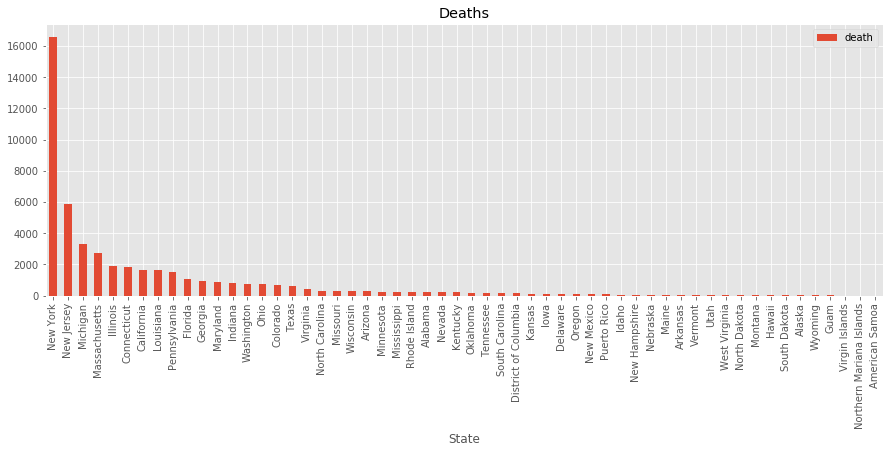

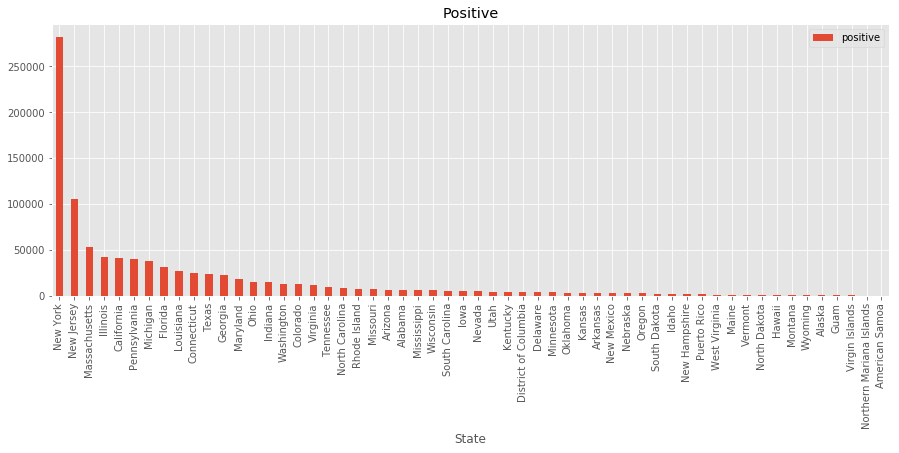

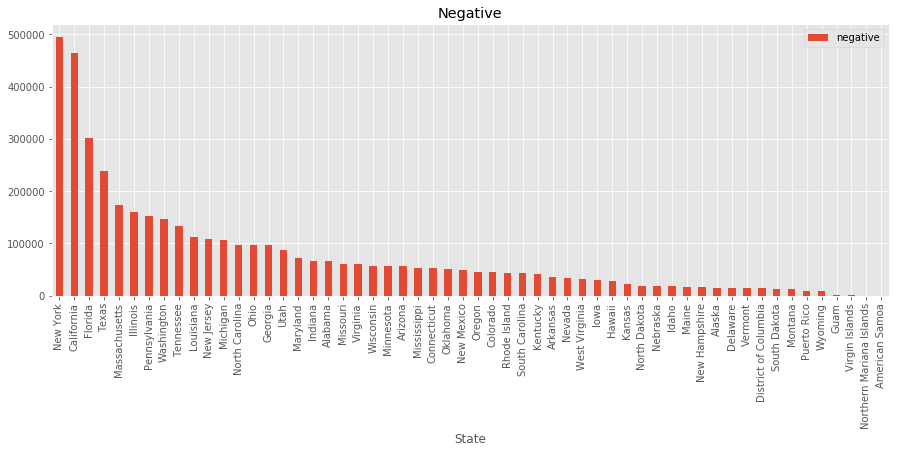

In [9]:
death_bar.plot(kind='bar', figsize=(15,5),title='Deaths')
positive_bar.plot(kind='bar', figsize=(15,5),title='Positive')
negative_bar.plot(kind='bar', figsize=(15,5),title='Negative')

In [10]:
df_covid['PN_ratio']=df_covid['positive']/df_covid['negative']
df_covid['DP_ratio']=df_covid['death']/df_covid['positive']
df_covid = df_covid.fillna(0)

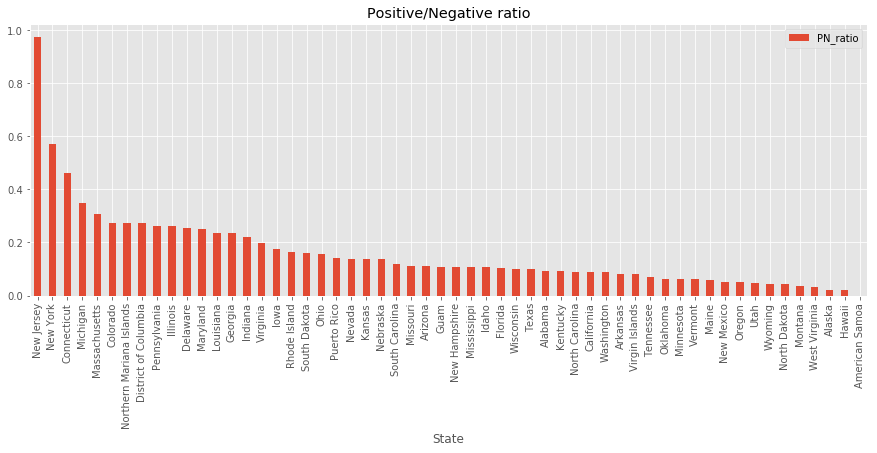

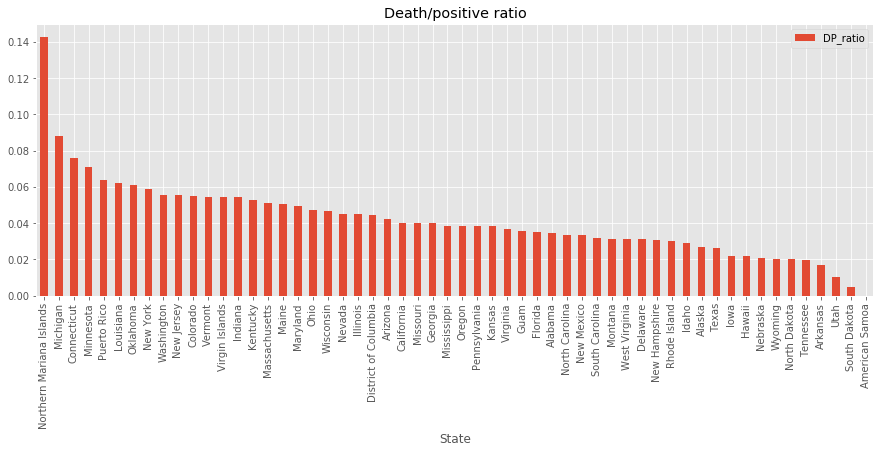

In [11]:
#Make dataframes for bar plots
PN_ratio_bar = df_covid[['State','PN_ratio']].sort_values(by=['PN_ratio'],ascending=False)
DP_ratio_bar = df_covid[['State','DP_ratio']].sort_values(by=['DP_ratio'],ascending=False)
#Set index
PN_ratio_bar = PN_ratio_bar.set_index('State')
DP_ratio_bar = DP_ratio_bar.set_index('State')
#Make plot
PN_ratio_bar.plot(kind='bar', figsize=(15,5),title='Positive/Negative ratio')
DP_ratio_bar.plot(kind='bar', figsize=(15,5),title='Death/positive ratio')

From the exploratory analysis of the covid-19 dataset it is clear, that the state of New York is the hardest hit state when looking at the total numbers of cases and deaths. The reason is that New York city has a high population density, why it is difficult to control the covid-19 outbreak. 

When looking at the positive/negative ratio New Jersie, New York, and Connecticut are hardest hit. There can be different reason for that. One is that only sick people are getting testet, and therefore not many get tested negative. Another is that the outbreak in these states simply are higher, which also can be seen from the positive bar chart. The death/positive ratio is highest in the Northern Mariana Islands. This is pacific island, and maybe the hospitals and medical equipment isn't that good, considering the limited number of citicens.

###### Demographic dataset

In [12]:
#load data
df_demo = pd.read_csv("Demographic_Data.csv")

#Finding the population for each state
State_pop = df_demo.groupby('State')['TotalPop'].sum()

#Merging the population to df4
df_demo = df_demo.merge(State_pop, on=['State'], how='left')

#Finding the population ratio for each county
df_demo['Pop_ratio']=df_demo['TotalPop_x']/df_demo['TotalPop_y']

#Removing the total state population
df_demo = df_demo.drop(['TotalPop_y'], axis=1)

In [13]:
#Defining the columns that needs to be normalized with state ratio
ratio_columns = ['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific',
       'Income', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']

#Normalizing the columns
df5=pd.DataFrame(df_demo['State'])
for column in df_demo[ratio_columns]:
    df5[column] = df_demo[column]*df_demo['Pop_ratio']

#merging the normalized columns with df4
df_demo = df_demo[['TotalPop_x','Men','Women']]
df_demo = pd.concat([df_demo, df5], axis=1)

#finding all info for each state
df_demo = df_demo.groupby('State').sum()

In [14]:
#Resets index 
df_demo = df_demo.reset_index()
#drop alaska, hawaii and puerto rico in order to have a better visualization
df_demo = df_demo.loc[~df_demo.State.isin(['Alaska', 'Hawaii', 'Puerto Rico'])]
#Resets index 
df_demo = df_demo.reset_index(drop=True)

In [15]:
#Men and Women distribution for each state
df_demo['Men_p'] = df_demo.Men/(df_demo.Men+df_demo.Women)
df_demo['Women_p'] = df_demo.Women/(df_demo.Men+df_demo.Women)

In [16]:
#Make dataframes for bar plots
Income_bar = df_demo[['State','Income']].sort_values(by=['Income'],ascending=False)
Poverty_bar = df_demo[['State','Poverty']].sort_values(by=['Poverty'],ascending=False)
Unemployment_bar = df_demo[['State','Unemployment']].sort_values(by=['Unemployment'],ascending=False)
TotalPop_bar = df_demo[['State','TotalPop_x']].sort_values(by=['TotalPop_x'],ascending=False)

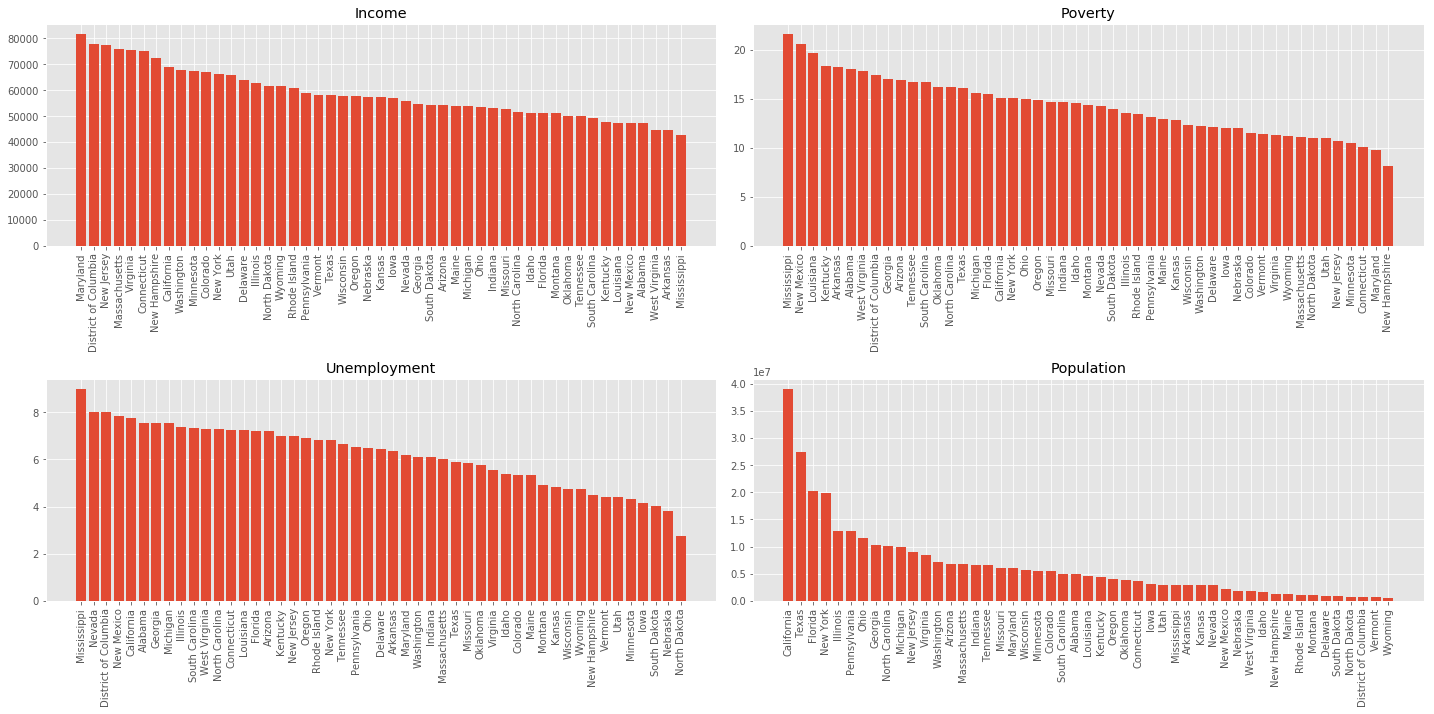

In [17]:
#Print different exploratory bar plots
fig, axs = plt.subplots(2, 2,figsize=(20,10))

axs[0, 0].bar(Income_bar.State,Income_bar.Income, label="Samples")
axs[0, 0].set_xticklabels(Income_bar.State, rotation=90)
axs[0, 0].set_title('Income')

axs[0, 1].bar(Poverty_bar.State,Poverty_bar.Poverty, label="Samples")
axs[0, 1].set_xticklabels(Poverty_bar.State, rotation=90)
axs[0, 1].set_title('Poverty')

axs[1, 0].bar(Unemployment_bar.State,Unemployment_bar.Unemployment, label="Samples")
axs[1, 0].set_xticklabels(Unemployment_bar.State, rotation=90)
axs[1, 0].set_title('Unemployment')

axs[1, 1].bar(TotalPop_bar.State,TotalPop_bar.TotalPop_x, label="Samples")
axs[1, 1].set_xticklabels(TotalPop_bar.State, rotation=90)
axs[1, 1].set_title('Population')
           
fig.tight_layout(pad=1)

In [18]:
# Read in shapefile and examine data
contiguous_usa = gpd.read_file('cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
#sort the values based on state name
contiguous_usa = contiguous_usa.sort_values(by=['NAME'])
#Rename the state column
contiguous_usa.rename(columns = {'NAME':'State'}, inplace = True)    

In [19]:
#merging the demographic data with the shapefile data                          
df_demo = contiguous_usa.merge(df_demo, on=['State'], how='left')
df_demo = df_demo.loc[~df_demo['State'].isin(['Alaska', 'Hawaii','Puerto Rico'])]

In [20]:
#Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = df_demo.to_json())

In [21]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = df_demo.TotalPop_x.min(), high = df_demo.TotalPop_x.max())

# Create figure object.
p = figure(title = 'Demographic Data (colored after population)', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'TotalPop_x',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@State'),
                                  ('Average Income','$@Income{0.00 a}'),
                                  ('Poverty','@Poverty%'),
                                  ('Unemployment','@Unemployment%'),
                                  ('Population','@TotalPop_x{0.00 a}'),
                                  ('Gender','Men(@Men_p%),  Women(@Women_p%)'),
                                  ('Race','Hispanic(@Hispanic%),  White(@White%)'),
                                  ('','Black(@Black%),  Native(@Native%)'),
                                  ('','Asian(@Asian%),  Pacific(@Pacific%)'),]))
show(p)

From the exploratory analysis of the demographic dataset, different factors such as population, poverty etc. has been analysed. From the simple bar charts, it is possible to compare the states on different factors. When looking at the average income, it can be concluded, that the northen states generally are having a higher income then the southern states. The poverty bar plot shows that most of the poor states are in the south. This makes sense from the conclusion about the income. The same tendency can be seen in the bar plot of the unemployment. The population can both be analysed from the bar chart but also the state map. Here it can be seen that the biggest state, when looking at population, is California, New York, Texas, and Florida. 

To get more specific state data, the map can be used. Here it is possible to see different state data such as income, poverty, gender, race etc. When looking at the gender, it is almost 50/50 men and women in each state. When looking at the race, there are significantly more white people in the north then in the south, compared to the total population. 

###### Population dataset

In [22]:
#load data
df_popu = pd.read_csv("data_population.csv")

In [23]:
Density_bar = df_popu[['State','Density']].sort_values(by=['Density'],ascending=False)
Pop_bar = df_popu[['State','Pop']].sort_values(by=['Pop'],ascending=False)
Landarea_bar = df_popu[['State','LandArea']].sort_values(by=['LandArea'],ascending=False)

In [24]:
Density_bar = Density_bar.set_index('State')
Pop_bar = Pop_bar.set_index('State')
Landarea_bar = Landarea_bar.set_index('State')

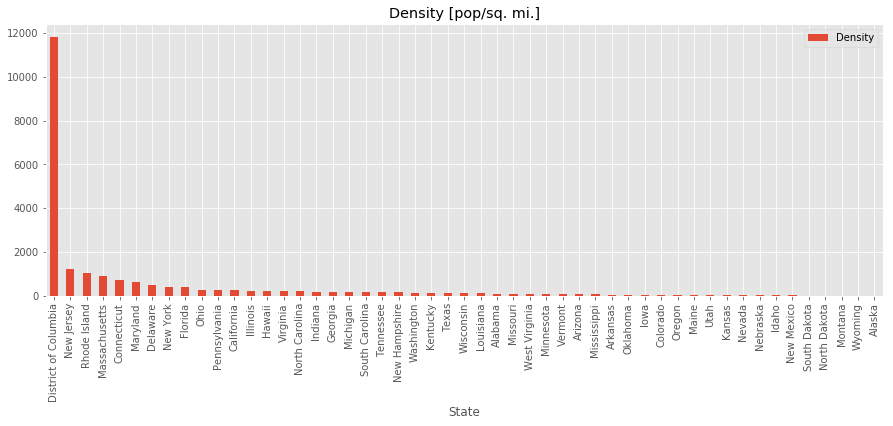

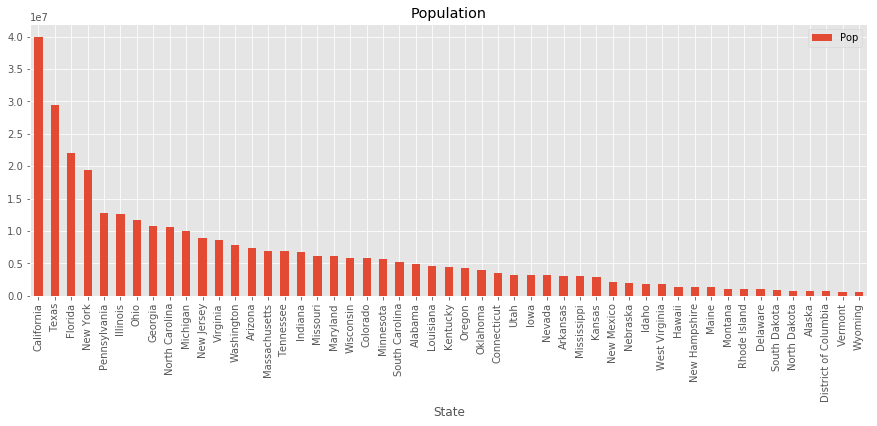

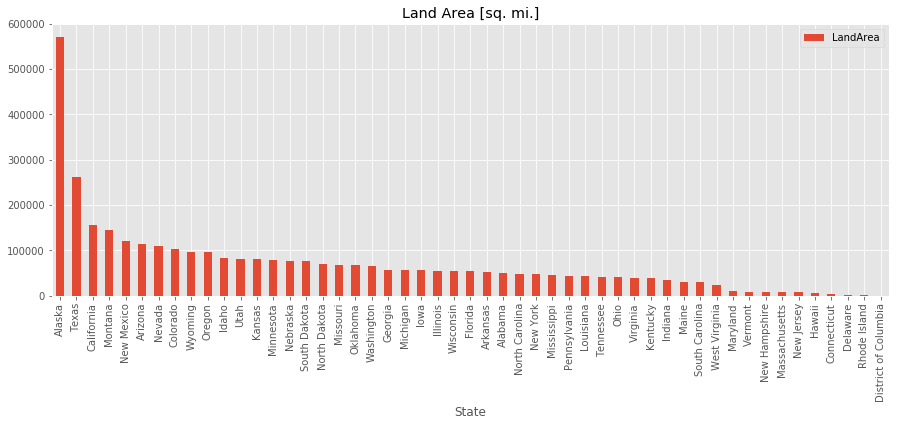

In [25]:
Density_bar.plot(kind='bar', figsize=(15,5),title='Density [pop/sq. mi.]')
Pop_bar.plot(kind='bar', figsize=(15,5),title='Population')
Landarea_bar.plot(kind='bar', figsize=(15,5),title='Land Area [sq. mi.]')

From the descriptive analysis of the population data, it is possible to get good insights. When looking at the density, District of Columbia is by far the most dense city. This make good sense, since the state is the smallest of all the states and is only covering the city Washington D.C. On the contrary, Alaska is the least dense state, due to the high area and low population.

## 3. Data analysis
#### Introduction
The Gifs and Interactive charts that are shown in the online article can’t be run in a Jupiter notebook. The code for the gif loops a lot of PNG images, and saves the locally before loading them and transforming them into a gif, and the interactive plots, needs to be hosted. This means that they can run from the computer, however they need to be launched from the terminal and can’t be run in the notebook, so they have been hosted online using Heroku and can be seen on the website. The code and data for these interactive maps can be found in the following GitHub repeater

Interactive Demographic data plot:

https://github.com/TrondFredskilde/poppeplot

Interactive COVID-19 development plot: 

https://github.com/TrondFredskilde/Covid_19_paper

Interactive bar chart of death in each state:

https://github.com/TrondFredskilde/covid-death

Interactive logarithmic line chart

https://github.com/TrondFredskilde/henrikfinal

The gifs has been made using this script:

https://github.com/TrondFredskilde/COVID_GIF

#### Analysis and take aways

#### machine-learning

## 4. Genre

Data stories tends to be linear and can be interactive, rase new questions and have alternative explanations. The main different between ordinary storytelling and data stories, is the complexity of the content that needs to be communicated. If visual storytelling is communicated in the right way, people have the possibility to get intuitive and fast insights from large and complex data sets. To make it easy for people to understand the covid-19 outbreak in the United states, we have chosen to present the analysis in an online magazine. The genre of the data story is therefore magazine style. 

#### Visual narrative
The group has done a consistent visual platform, by using the same structure and type of plots through out the paper. Furhter more feature distinction has been widely used, to give the reader a clear overview of the outbreak. In the maps, zooming has been applied to increase the interactivity. 

#### Narrative structure
The ordering of the assignment is linear. This is a common storytelling method which ensures, that the element comes in the order in which they occurres. This is chosen to guide the reader through the article.

When looking at the interactivity in the article, hovers, filters, and navigation buttons are used. This is done to increase the interactivity and make sure that the user are getting guided through the article. Furthermore, Captions and introducing text are made to make the article more self explanatory.


## 5. Visualizations

###### 5.1 Bar charts:
The bar charts chosen for the exploratory data analysis in the project, gives the reader a quick way to compare different metrics relevant to the COVID-19 outbreak across the different US states. In some of the charts, the y-axis has been hold fixed, even though makes some of the bars very small for some states. However, this makes it easier for the reader to grasp the difference across states. 

###### 5.2 Heat maps:
The heat maps has been used to illustrate the number of infected and the deaths across the states. It is very useful in the article. It is both fun to watch, intuitive, and really informative. 

###### 5.3 Interactive charts:
Heat maps, bar charts and lineplots has all been made interactive in the web article. The interactive maps gives the reader the possibility to dive into particular parts of the plot which is of their interest. 

###### 5.4 Line chart:
The line charts axis are of logarithmic scale, which transforms the exponential growth to a linear line, this makes it easy for the reader to see when the exponential growths stops being exponential as explained in the web article. Furthermore, the chart is interactive and the bottom slider can from the reader be used to “predict” the future.

## 6. Discussion


#### 6.1 What went well 

In the web article we have managed to give the reader a good overview of how COVID-19 has spread across the different states in the US. The goal was to transform our data analysis, into visualisations that could be understood by everyone which is the case!

We could imagine the page as a state founded page, which goal was to spread information about the COVID-19 spread to the population, then having GIF’s and interactive maps, which we know helps keep the reader interested, is very valuable, such that the reader doesn’t get bored. Furthermore, it helps the reader dive into their specific state, so that the website could reach out to the entire US.

We have seen how political initiatives, such as the difference in testing strategy between the states, can visually be seen in the graphs. We have managed to show this in the article and make it understandable. 

Lastly, we have shown how machine learning could predict into the future, how the spread would develop. Using a slider for this and changing colours for the future predictions, helps the common reader of the article, to understand that it is a calculated “prediction” and not something that is certain.

#### 6.2 missing elements

Of course things can always get better. We have used very simple ML for the future predictions, so being data analyst, we wanted to use more time in this fase, however the important part was to illustrate it, the the algorithms can always be improved (at least in this course :-)) 

We have chosen to host our Bokeh plots on a so called Heroku server. They are not always 100% reliable and sometimes a little slow. It took quit some time to get these to work.

## 7. Contributions
First of all, we have all contributed equally to the assignment, and have had a very good team work in the group. Being a responsible for a part doesn’t mean that the others haven’t contributed to the part, which should be considered in the grading. 


Text and basic graphs for website: Trond

Interactive Demographic data plot: Peter

Interactive COVID-19 development plot: Trond

Interactive bar chart of death in each state: Henrik

Interactive logarithmic line chart: Henrik

Text for interactive logarithmic line chart: Henrik

Gifs: Trond

Machine Learning: Henrik

Overall notebook: Peter

Motivation: Peter

Basic stats: Peter

Data Analysis: Henrik

Genre: Peter

Visualizations: Trond

Discussion: Trond